<a href="https://colab.research.google.com/github/deeplearning-itba/NLP-Embeddings/blob/master/06_glove_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Agregar este archivo a la carpeta de google drive clickeando en el link y clickeando el '+' arriba a la derecha

https://drive.google.com/open?id=1jJ20oNZIysi-V-iORAE0eEZq4LhuWxUW

In [2]:
import codecs
import numpy as np

In [3]:
# ! wget http://nlp.stanford.edu/data/glove.6B.zip
print('done!')

done!


In [ ]:
# ! unzip glove.6B.zip
print('done!')

done!


In [4]:
EMBEDDING_DIR = "/content/drive/My Drive/"
print('done!')

done!


In [5]:
def load_embeddings(file, embed_dim=100):
  #load embeddings

  print('loading word embeddings...')
  embeddings_index = {}
  f = codecs.open(EMBEDDING_DIR+'glove.6B.100d.txt', encoding='utf-8')
  for line in f:
      values = line.rstrip().rsplit(' ')
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  print('found %s word vectors' % len(embeddings_index))
  return embeddings_index

In [6]:
# embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.300d.txt', embed_dim=300)
embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.100d.txt')

loading word embeddings...
found 400000 word vectors


In [7]:
# Armar matriz de embeddings de 400000x100
matrix_word_vectors = np.array([list(item) for item in embeddings_index.values()]) # Se puede armar en una linea haciendo un cast a np.array y un .values del dict
print('done!')


done!


In [8]:
np.shape(matrix_word_vectors)

(400000, 100)

In [9]:
# Aramr lista con vocabilario
vocab_list = np.array([item for item in embeddings_index.keys()]) # Se puede armar con una linea .keys del dict

In [10]:
print(vocab_list[0])

the


In [11]:
np.shape(vocab_list)

(400000,)

In [12]:
matrix_word_vectors.shape

(400000, 100)

In [13]:
matrix_word_vectors[0]

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [14]:
from sklearn.neighbors import NearestNeighbors

# Entrenar un modelo de Nearest neighbours con los 20 primeros y distancia coseno

In [15]:
nearest = NearestNeighbors(n_neighbors=20, metric="cosine")

In [16]:
# Entrenar modelo
nearest.fit(matrix_word_vectors)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [17]:
def get_analogy_by_word(word1, word2, word3, embeddings_index=embeddings_index):
  # word1 es a word2 como word3 es a word4
  # Tiene que devolver word4
  v_word1 = embeddings_index[word1]
  v_word2 = embeddings_index[word2]
  v_word3 = embeddings_index[word3]

  v_word4 = v_word2 - v_word1  + v_word3

  distances, neig_idx = nearest.kneighbors([v_word4])

#   print("distances: ",np.shape(distances))
#   print("neig_idx: ",np.shape(neig_idx))

#   print("distancias: ", distances[0])
#   print("indices: ", neig_idx[0])
    
  for idx, real_index in enumerate(neig_idx[0]):  
    word4 = vocab_list[neig_idx[0][idx]]
    if (word3 != word4):
      break
  return word4

In [18]:

def get_analogy(word1, word2, word3, embeddings_index=embeddings_index):
  # word1 es a word2 como word3 es a word4
  # Tiene que devolver word4
  v_word1 = embeddings_index[word1]
  v_word2 = embeddings_index[word2]
  v_word3 = embeddings_index[word3]

  v_word4 = v_word2 - v_word1  + v_word3

  distances, neig_idx = nearest.kneighbors([v_word4])
  # print(neig_idx[0][0])
  # print(embeddings_index[neig_idx[0][0]])
  return embeddings_index[vocab_list[neig_idx[0][0]]]

In [19]:
analogy_vector = get_analogy_by_word('switzerland', 'alps', 'argentina')

In [20]:
analogy_word = get_analogy_by_word('switzerland', 'alps', 'argentina')

In [21]:
print(analogy_word)

andes


In [22]:
analogy_word = get_analogy_by_word('woman', 'man', 'queen')

In [23]:
print(analogy_word)

king


In [24]:
analogy_word = get_analogy_by_word('messi', 'soccer', 'federer')

In [25]:
print(analogy_word)

tennis


In [26]:
analogy_word = get_analogy_by_word('woman', 'women', 'man')

In [27]:
print(analogy_word)

men


In [28]:
analogy_word = get_analogy_by_word('man', 'woman', 'son')

In [29]:
print(analogy_word)

daughter


In [30]:
def get_nearests_words_by_word(vector, nearest=nearest):
  # Dado un vector, tiene que devolver la lista de los 20 mas cercanos
  v_word = embeddings_index[vector]
  _, neig_idx = nearest.kneighbors([v_word])

  words_list = []
  for idx, real_index in enumerate(neig_idx[0]): 
    words_list.append(vocab_list[neig_idx[0][idx]])
  return words_list

In [31]:
def get_nearests_words(vector, nearest=nearest):
  # Dado un vector, tiene que devolver la lista de los 20 mas cercanos
  _, neig_idx = nearest.kneighbors([vector])

  words_list = []
  for idx, real_index in enumerate(neig_idx[0]):
    words_list.append(vocab_list[neig_idx[0][idx]])
  return words_list


In [32]:
# Probar las siguientes analogías
#
# woman -> man, queen -> ?
# england -> london, france-> ?
# woman -> women, man -> ?
# messi -> soccer, federer -> ?
# switzerland -> alps, argentina ->

analogy_vector = get_analogy('switzerland', 'alps', 'argentina')

In [33]:
# Probar función get_nearests_words
similars = get_nearests_words(analogy_vector)

In [34]:
print(similars)

['andes', 'foothills', 'mountains', 'cordillera', 'himalayas', 'patagonia', 'andean', 'himalaya', 'jungles', 'apennines', 'highlands', 'peru', 'alps', 'slopes', 'ural', 'madre', 'lowlands', 'carpathians', 'elevations', 'deserts']


In [35]:
animals = ['dog',
 'cat',
 'dogs',
 'pet',
 'puppy',
 'horse',
 'animal',
 'pig',
 'boy',
 'cats',
 'rabbit',
 'goat',
 'sled',
 'monkey',
 'cow',
 'rat',
 'breed',
 'mad',
 'hound',
 'bird']

In [36]:
transport = ['car',
 'vehicle',
 'truck',
 'cars',
 'driver',
 'driving',
 'motorcycle',
 'vehicles',
 'parked',
 'bus',
 'taxi',
 'suv',
 'pickup',
 'jeep',
 'mercedes',
 'cab',
 'bicycle',
 'drivers',
 'automobile',
 'train']

In [37]:
countries = ['argentina',
 'england',
 'australia',
 'spain',
 'brazil',
 'portugal',
 'zealand',
 'scotland',
 'match',
 'africa',
 'wales',
 'ireland',
 'italy',
 'matches',
 'france',
 'indies',
 'uruguay',
 'britain',
 'netherlands',
 'united']

In [38]:
professions = ['engineer',
 'scientist',
 'economist',
 'professor',
 'consultant',
 'director',
 'dr.',
 'doctor',
 'researcher',
 'expert',
 'physician',
 'officer',
 'surgeon',
 'chief',
 'assistant',
 'specialist',
 'associate',
 'author',
 'worked',
 'psychologist']

In [39]:
all_words = animals + transport + countries + professions

In [40]:
vectors_subset = np.array([embeddings_index[word] for word in all_words])

In [41]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE(2, verbose=1)

In [43]:
%time embed_2d_tsne = tsne.fit_transform(vectors_subset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.172693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.154976
[t-SNE] KL divergence after 1000 iterations: 0.258298
CPU times: user 931 ms, sys: 97.1 ms, total: 1.03 s
Wall time: 552 ms


In [44]:
from matplotlib import pyplot as plt

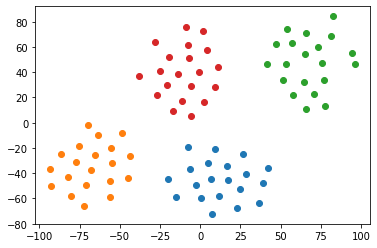

In [45]:
for i in range(4):
  plt.scatter(embed_2d_tsne[i*20:(i+1)*20,0], embed_2d_tsne[i*20:(i+1)*20,1], c=f'C{i}')